In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


In [7]:
image=["sad1.jpeg","relaxed.webp","sad.webp","relaxed1.jpeg"]
face=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

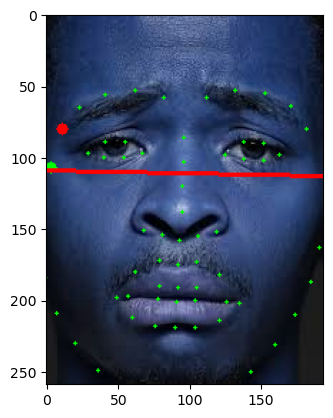

-----> 54


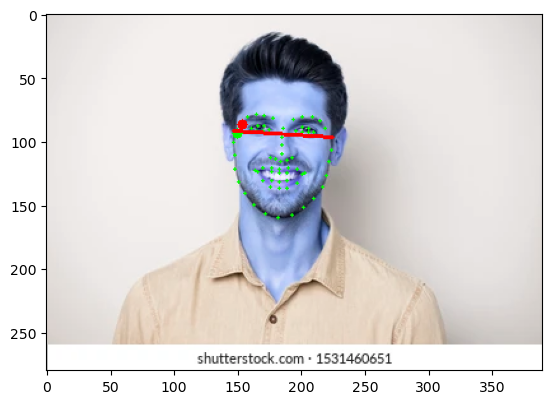

-----> 14


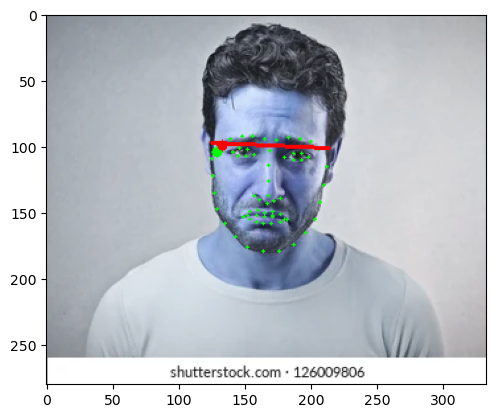

-----> 10


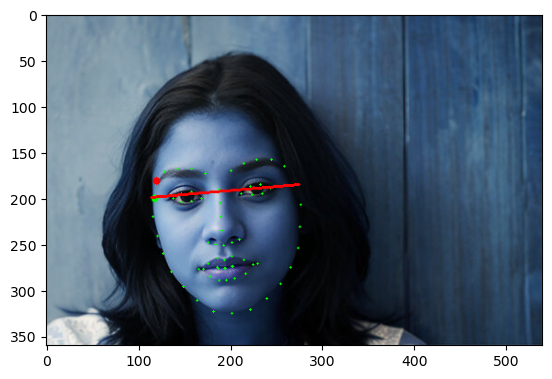

-----> 39


In [11]:
for i in image:  
    img=cv2.imread(i)
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    faces = detector(img)

    for face in faces:
        landmarks = predictor(img, face)
        landmarks_np = [[p.x, p.y] for p in landmarks.parts()]
        for (x, y) in landmarks_np:
            cv2.circle(img, (x, y), 1, (0, 255, 0), -1)
        landmark_x = landmarks.part(1).x  # X-coordinate of the specified landmark
        landmark_y = landmarks.part(1).y 
       
        landmark_x1 = landmarks.part(17).x  # X-coordinate of the specified landmark
        landmark_y1 = landmarks.part(17).y 
        x=(landmark_x+landmark_x1)//2
        y=(landmark_y+landmark_y1)//2
        cv2.circle(img, (x,y), 4, (0, 255, 0), -1)
        cv2.circle(img, (landmark_x1,landmark_y1), 4, (255,0, 0), -1)
        cv2.line(img,(landmarks_np[0][0],landmarks_np[0][1]),(landmarks_np[16][0],landmarks_np[16][1]),(255,0, 0),2)
        diff_left=landmark_y-landmark_y1
        plt.imshow(img)
        plt.show()
        print("----->",diff_left)
        
        
        

    #right_vertical_displacement = abs(landmarks_np[22][0] - landmarks_np[21][0])
    #print(right_vertical_displacement)
    

In [ ]:
import cv2
import dlib
import numpy as np

# Load face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def eye_aspect_ratio(eye):
    # Compute the euclidean distances between the two sets of vertical eye landmarks
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    # Compute the euclidean distance between the horizontal eye landmarks
    C = np.linalg.norm(eye[0] - eye[3])
    # Compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    return ear

def detect_head_pose(landmarks):
    # Extract eye landmarks
    left_eye = landmarks[36:42]
    right_eye = landmarks[42:48]

    # Calculate EAR for each eye
    left_ear = eye_aspect_ratio(left_eye)
    right_ear = eye_aspect_ratio(right_eye)

    # Determine head pose based on EAR values
    if left_ear < 0.2 and right_ear < 0.2:
        return "Forward"
    elif left_ear > right_ear:
        return "Looking Right"
    else:
        return "Looking Left"

# Load image
image = cv2.VideoCapture(0)

# Convert image to grayscale

res,frame=image.read()
# Detect faces in the grayscale image

while True:
    res,frame=image.read()
    if res==True:
        faces = detector(frame)
        for face in faces:
            # Predict facial landmarks
            landmarks = predictor(frame, face)
            landmarks = np.array([[p.x, p.y] for p in landmarks.parts()])

            # Determine head pose
            head_pose = detect_head_pose(landmarks)

            # Display head pose
            cv2.putText(frame, head_pose, (face.left(), face.top() - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Draw facial landmarks on the image
            for (x, y) in landmarks:
                cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
    if cv2.waitKey(2) & 0xFF == ord('q'):
            break

    # Display the output image
    cv2.imshow('Head Pose Detection', frame)
cv2.waitKey(0)
image.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import dlib
import numpy as np

# Load face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def eye_aspect_ratio(eye):
    # Compute the euclidean distances between the two sets of vertical eye landmarks
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    # Compute the euclidean distance between the horizontal eye landmarks
    C = np.linalg.norm(eye[0] - eye[3])
    # Compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    return ear

def detect_gaze_direction(landmarks):
    # Extract eye landmarks
    left_eye = landmarks[36:42]
    right_eye = landmarks[42:48]

    # Calculate EAR for each eye
    left_ear = eye_aspect_ratio(left_eye)
    right_ear = eye_aspect_ratio(right_eye)

    # Calculate eye centers
    left_eye_center = np.mean(left_eye, axis=0).astype(int)
    right_eye_center = np.mean(right_eye, axis=0).astype(int)

    # Calculate eye gaze direction
    eye_gaze = ""
    if left_ear < 0.2 and right_ear < 0.2:
        eye_gaze = "Closed"
    elif left_eye_center[0] < right_eye_center[0]:
        eye_gaze = "Left"
    else:
        eye_gaze = "Right"

    # Check vertical eye position for up or down gaze
    eye_vertical_pos = (left_eye_center[1] + right_eye_center[1]) // 2
    face_height = landmarks[8][1] - landmarks[27][1]
    eye_center_offset = eye_vertical_pos - landmarks[27][1]
    eye_center_ratio = eye_center_offset / face_height

    if eye_center_ratio < 0.3:
        eye_gaze += " Up"
    elif eye_center_ratio > 0.7:
        eye_gaze += " Down"

    return eye_gaze

# Initialize webcam capture
cap = cv2.VideoCapture(0)

while True:
    # Capture frame from webcam
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame")
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = detector(gray)

    for face in faces:
        # Predict facial landmarks
        landmarks = predictor(gray, face)
        landmarks = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Determine gaze direction
        gaze_direction = detect_gaze_direction(landmarks)

        # Display gaze direction
        cv2.putText(frame, gaze_direction, (face.left(), face.top() - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Draw facial landmarks on the frame
        for (x, y) in landmarks:
            cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)

    # Display the output frame
    cv2.imshow('Gaze Direction Detection', frame)

    # Check for 'q' key to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


In [13]:
camera = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
_, frame = camera.read()
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
faces = detector(frame_gray)

cx, cy = 0, 0
cx_, cy_ = 0, 0
MIN_MOVE = 10

if len(faces) > 0:
    landmarks = predictor(frame_gray, faces[0])
    cx_ = (landmarks.part(0).x + landmarks.part(16).x) // 2
    cy_ = (landmarks.part(0).y + landmarks.part(16).y) // 2

while True:
    _, frame = camera.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale frame
    faces = detector(frame_gray)

    if len(faces) > 0:
        landmarks = predictor(frame_gray, faces[0])
        cx = (landmarks.part(0).x + landmarks.part(16).x) // 2
        cy = (landmarks.part(0).y + landmarks.part(16).y) // 2

        cv2.rectangle(frame, (landmarks.part(0).x, landmarks.part(0).y),
                          (landmarks.part(16).x, landmarks.part(16).y), (0, 0, 255), 2)

        if abs(cx - cx_) > abs(cy - cy_):
            if cx - cx_ > MIN_MOVE:
                cv2.putText(frame,"left",(0, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)
                print('LEFT')
            elif cx - cx_ < -MIN_MOVE:
                cv2.putText(frame,"right",(0, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)
                print('RIGHT')
        else:
            if cy - cy_ > MIN_MOVE:
                cv2.putText(frame,"down",(0, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)
                print('DOWN')
            elif cy - cy_ < -MIN_MOVE:
                cv2.putText(frame,"up",(0, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)
                print('UP')

    cv2.imshow("Unlock Face", frame)
    key = cv2.waitKey(30)
    cx_, cy_ = cx, cy
camera.release()
cv2.destroyAllWindows()

DOWN
DOWN
DOWN
UP
UP
UP
UP
UP
DOWN
DOWN
UP
RIGHT
DOWN
UP
DOWN
UP
DOWN
LEFT
DOWN
UP
DOWN
RIGHT
DOWN
RIGHT
RIGHT
RIGHT
UP
LEFT
LEFT
LEFT
DOWN
LEFT
DOWN
UP
DOWN
UP
LEFT
UP
UP
UP
UP
DOWN
DOWN
DOWN
LEFT
RIGHT
LEFT
RIGHT
LEFT
UP
RIGHT
RIGHT
RIGHT
DOWN
UP
UP
DOWN
DOWN
DOWN
DOWN
UP
UP
UP
UP
DOWN
UP
DOWN
DOWN
DOWN
DOWN
UP
DOWN
UP
RIGHT
LEFT
UP
RIGHT
LEFT
LEFT
UP
DOWN
UP
DOWN
DOWN
RIGHT
LEFT
RIGHT
DOWN
RIGHT
DOWN
UP
RIGHT
LEFT
DOWN
UP
LEFT
RIGHT
LEFT
RIGHT
LEFT
RIGHT
LEFT
RIGHT
LEFT
RIGHT
LEFT
RIGHT
LEFT
RIGHT
UP
RIGHT
UP
UP
RIGHT
LEFT
RIGHT
UP
DOWN
DOWN
UP
LEFT
UP
DOWN
DOWN
UP
UP
DOWN
LEFT
LEFT
UP
RIGHT


KeyboardInterrupt: 